In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importation des données : 


In [26]:
data = pd.read_csv('projects.csv')

In [97]:
data.columns

Index(['project_name', 'responsible', 'budget(k$)', 'members', 'months'], dtype='object')

In [98]:
data['members']

0        1
1        2
2        3
3        3
4        4
        ..
2995    16
2996    16
2997    15
2998    17
2999    17
Name: members, Length: 3000, dtype: int64

In [27]:
data.shape

(3000, 5)

In [28]:
data.columns

Index(['project_name', 'responsible', 'budget(k$)', 'members', 'months'], dtype='object')

In [29]:
data.head()

project_name responsible  budget(k$)  members  months
0      Zontrax      Sascha         0.0        1       8
1       Kanlam     Merlina         1.3        2       7
2   Stronghold    Mattheus         0.6        3       7
3       Sub-Ex       Avery         1.4        3       6
4     Wrapsafe      Cassie         1.2        4       8

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   project_name  3000 non-null   object 
 1   responsible   3000 non-null   object 
 2   budget(k$)    3000 non-null   float64
 3   members       3000 non-null   int64  
 4   months        3000 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 117.3+ KB


## Extraire les variables a entrainer pour notre modèle  : 


In [31]:
model_data=data[['budget(k$)','members','months']]

In [32]:
model_data.head()

budget(k$)  members  months
0         0.0        1       8
1         1.3        2       7
2         0.6        3       7
3         1.4        3       6
4         1.2        4       8

## Afficher la correlation entre les variables  : 

In [33]:
Target=model_data['months']
Data=model_data.drop(['months'], axis=1)

In [34]:
Data.columns

Index(['budget(k$)', 'members'], dtype='object')

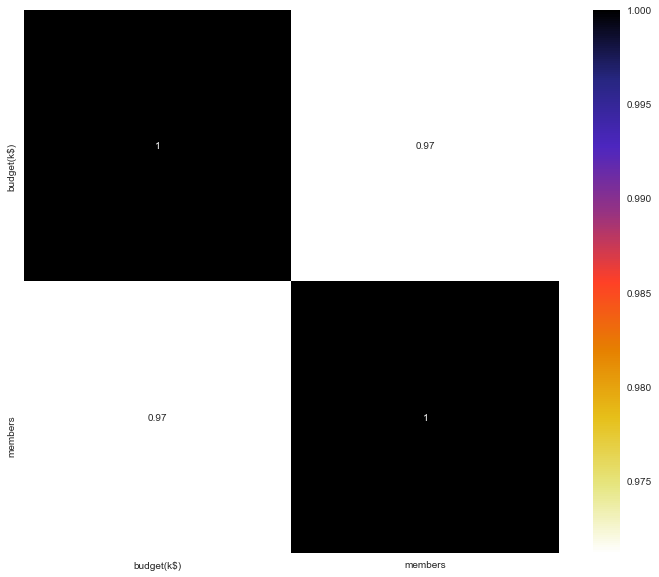

In [35]:
plt.figure(figsize=(12,10))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

#### On peut voir que les deux variable budget et membre sont fortement correlées 

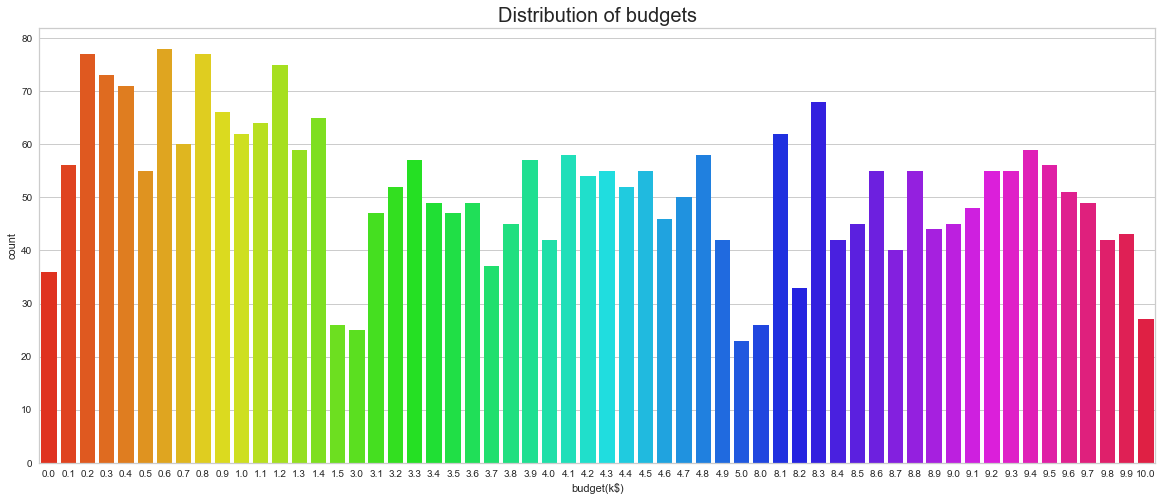

In [36]:

plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(model_data['budget(k$)'], palette = 'hsv')
plt.title('Distribution of budgets', fontsize = 20)
plt.show()

In [37]:
x= Data.to_numpy()

In [38]:
y=Target.to_numpy()

## Diviser les données : données d'entrainement et données de test 

### 1)  Regression Lineaire  : 


In [39]:
# Split data into train and test formate
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

In [40]:
#Train the model
from sklearn import linear_model
model = linear_model.LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
#Prediction example 
print("Predict value " + str(model.predict([X_test[598]])))
print("Real value " + str(y_test[598]))

Predict value [1.14006373]
Real value 2


In [43]:
print("score --> ", model.score(X_test, y_test)*100)

score -->  85.9608219292911


In [44]:
y_pred = model.predict(X_test)

In [45]:
pred_test_RL = list(zip(y_test,y_pred))

In [46]:
pred_test_RL

[(3, 4.252117591612568),
 (1, 1.23153521826121),
 (8, 6.144888835055282),
 (4, 4.710486673080423),
 (2, 0.8958025496198392),
 (4, 4.389324822726632),
 (4, 4.329018260734365),
 (4, 3.886231641975064),
 (2, 0.9113850123283935),
 (1, 1.3833132676628521),
 (3, 4.2832825170296775),
 (3, 4.114910360498504),
 (8, 6.75503596592478),
 (8, 6.205195397047548),
 (3, 3.9475498483883067),
 (1, 0.9259558306159725),
 (1, 0.9872740370292146),
 (3, 4.039021335797683),
 (1, 0.8344843432065963),
 (1, 0.6515413683878446),
 (7, 6.175042116051415),
 (3, 4.160646104203192),
 (4, 4.207393492328856),
 (3, 3.856078360978931),
 (1, 0.7887485995019086),
 (4, 4.023438873089128),
 (3, 4.023438873089128),
 (2, 1.1244812681432794),
 (8, 6.2665136034607904),
 (7, 6.220777859756103),
 (2, 1.2772709619658977),
 (6, 6.693717759511538),
 (1, 1.2918417802534767),
 (6, 6.617828734810716),
 (1, 0.880220086911284),
 (2, 1.4602139367846494),
 (3, 4.374754004439053),
 (3, 4.542114516549251),
 (3, 4.252117591612568),
 (4, 4.72505

In [47]:
Verifications_RL=pd.DataFrame(pred_test_RL,columns=['Valeurs réels','Prédictions_RL'])

In [48]:
Verifications_RL

Valeurs réels  Prédictions_RL
0                3        4.252118
1                1        1.231535
2                8        6.144889
3                4        4.710487
4                2        0.895803
..             ...             ...
595              1        1.291842
596              1        0.834484
597              4        3.947550
598              2        1.140064
599              6        6.846507

[600 rows x 2 columns]

## évaluation du modèle : 

### 1) Mean Squared error : 

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mean_squared_error(y_test,y_pred)

0.7967666429784482

### 2)  R squared adjusted 

In [51]:
import statsmodels.api as sm 

In [52]:
x=sm.add_constant(x)

In [53]:
rsquared = sm.OLS(y,x).fit()

In [54]:
print((rsquared.rsquared_adj)*100)

84.6174451091129


### 2)  Arbre de décision : 


In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier()

In [57]:
dtc_model = DecisionTreeClassifier().fit(X_train, y_train)

In [58]:
y_pred_dtc = dtc_model.predict(X_test)

In [59]:
pred_test_DT = list(zip(y_test,y_pred_dtc))

In [60]:
Verifications_DT=pd.DataFrame(pred_test_RL,columns=['Valeurs réels','Prédictions_DT'])

In [61]:
Verifications_DT

Valeurs réels  Prédictions_DT
0                3        4.252118
1                1        1.231535
2                8        6.144889
3                4        4.710487
4                2        0.895803
..             ...             ...
595              1        1.291842
596              1        0.834484
597              4        3.947550
598              2        1.140064
599              6        6.846507

[600 rows x 2 columns]

In [62]:
print("score -->", dtc_model.score(X_test, y_test)*100)

score --> 49.0


## évaluation du modèle : 

### 1) Mean Squared error : 

In [63]:
mean_squared_error(y_test,y_pred_dtc)

0.705

 ## Valeurs réels / Prédictions RL / Prédictions DTC

In [64]:
Verification_final=pd.merge(Verifications_RL,Verifications_DT,on="Valeurs réels")

In [65]:
Verification_final

Valeurs réels  Prédictions_RL  Prédictions_DT
0                  3        4.252118        4.252118
1                  3        4.252118        4.283283
2                  3        4.252118        4.114910
3                  3        4.252118        3.947550
4                  3        4.252118        4.039021
...              ...             ...             ...
53523              6        6.846507        6.282096
53524              6        6.846507        6.373568
53525              6        6.846507        6.067988
53526              6        6.846507        6.266514
53527              6        6.846507        6.846507

[53528 rows x 3 columns]

In [66]:
Borne_Inferieur=Verification_final.min()
Borne_Superieur=Verification_final.max()

In [84]:
a=(Verification_final.index.values).tolist()

In [68]:
Y1,Y2,Y3=Verification_final['Valeurs réels'],Verification_final['Prédictions_RL'],Verification_final['Prédictions_DT']